<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/grover_search_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Grover search for boolean satisfiability
### *Throwing a party while avoiding the drama*

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D)`

In [9]:
# Do the necessary import for our program
!pip install qiskit
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover
from qiskit import Aer
from qiskit.visualization import plot_histogram



Let's go ahead and use our expression in a Grover search to find out compatible combinations of people to invite.
> Note: We'll represent `and` with `&`, `or` with `|`, `not` with `~` in our expression. 

In [10]:
oracle = PhaseOracle('((A & B) | (C & D)) & ~(A & D)')
problem = AmplificationProblem(oracle)

Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [11]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = Aer.get_backend("aer_simulator")

grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)

print(result.top_measurement)

0011


Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

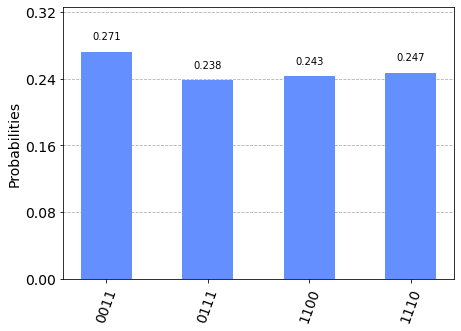

In [12]:
counts = result.circuit_results
plot_histogram(counts)

#### Now it's you're turn to play!

Create and implement your own scenario that can be modeled as a boolean satisfiability problem using Grover search. Have fun with it, and carry on with your quantum computing journey!